<a href="https://colab.research.google.com/github/chooiyeng/neural-comp---text-to-image-LLMs/blob/main/Assignment2_7a%26b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Shallow vs Deep Network

### 1.1 Design a few shallow and deep networks. Examples are below.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [ ]:
input_size = 784
hidden_size = 128
num_classes = 10
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./content', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./content', train=False, transform=transform, download=True)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class ShallowNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ShallowNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)


class DeepNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(DeepNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, num_classes)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)


class DeeperNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(DeeperNN, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_sizes[-1], num_classes))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)


shallow_model = ShallowNN(input_size, hidden_size, num_classes)
deep_model = DeepNN(input_size, hidden_size, hidden_size, num_classes)
deeper_model = DeeperNN(input_size, [hidden_size] * 5, num_classes)


100%|██████████| 9912422/9912422 [00:00<00:00, 77792455.79it/s]


Extracting ./content/MNIST/raw/train-images-idx3-ubyte.gz to ./content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 50705606.46it/s]

Extracting ./content/MNIST/raw/train-labels-idx1-ubyte.gz to ./content/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 15302506.71it/s]


Extracting ./content/MNIST/raw/t10k-images-idx3-ubyte.gz to ./content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12968365.40it/s]


Extracting ./content/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./content/MNIST/raw



In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./content', train=True, transform=transform, download=True) # 6000
test_dataset = datasets.MNIST(root='./content', train=False, transform=transform, download=True) # 1000

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 80959681.98it/s]


Extracting ./content/MNIST/raw/train-images-idx3-ubyte.gz to ./content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 8504928.30it/s]


Extracting ./content/MNIST/raw/train-labels-idx1-ubyte.gz to ./content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 20205539.36it/s]


Extracting ./content/MNIST/raw/t10k-images-idx3-ubyte.gz to ./content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13138295.70it/s]


Extracting ./content/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./content/MNIST/raw



In [ ]:
class ShallowNN(nn.Module):
  def __init__(self,input_size, hidden_size,num_classes):
    super(ShallowNN,self).__init__()
    #Your code here
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    #Your code here
    x = x.view(-1, 784)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x


class DeepNN(nn.Module):
  def __init__(self,input_size, hidden_size1,hidden_size2,num_classes):
    super(DeepNN,self).__init__()
    #Your code here
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size1, hidden_size2)
    self.fc3 = nn.Linear(hidden_size2, num_classes)

  def forward(self,x):
    x = x.view(-1, 784)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x


class DeeperNN(nn.Module):
  def __init__(self,input_size, hidden_size1,hidden_size2,hidden_size3,hidden_size4,hidden_size5,num_classes):
    super(DeeperNN,self).__init__()
    #Your code here
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size1, hidden_size2)
    self.fc3 = nn.Linear(hidden_size2, hidden_size3)
    self.fc4 = nn.Linear(hidden_size3, hidden_size4)
    self.fc5 = nn.Linear(hidden_size4, hidden_size5)
    self.fc6 = nn.Linear(hidden_size5, num_classes)

  def forward(self,x):
    x = x.view(-1, 784)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    x = self.relu(x)
    x = self.fc5(x)
    x = self.relu(x)
    x = self.fc6(x)
    return x


### 1.2 Train your Shallow vs Deep Network on the MNIST dataset.

In [ ]:
def training(model,train_loader):
  Loss = []
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01)

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)

  num_epochs = 10

  for epoch in range(num_epochs):
      running_loss = 0.0
      correct = 0
      total = 0

      for images, labels in train_loader:
          # Move images and labels to the same device as the model
          images = images.to(device)
          labels = labels.to(device)

          # Zero the gradients
          optimizer.zero_grad()

          # Forward pass
          outputs = model(images)
          loss = criterion(outputs, labels)

          # Backward pass and optimization
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

          # Calculate accuracy
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      # Print average loss per batch and accuracy for the epoch
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")
      Loss.append(running_loss/len(train_loader))
  return Loss

In [ ]:
model_shallow = ShallowNN(784, 128, 10) #input_size,hidden_size,num_classes
model_deep = DeepNN(784, 128, 128, 10) #input_size,hidden_size1,hidden_size2,num_classes
model_deeper = DeeperNN(784, 128, 16, 16, 16, 16, 10) #input_size,hidden_size1,hidden_size2,num_classes

training_shallow_loss =  training(model_shallow, train_dataloader)
training_deep_loss =  training(model_deep, train_dataloader)
training_deeper_loss =  training(model_deeper, train_dataloader)

Epoch [1/10], Loss: 0.7515, Accuracy: 81.72%
Epoch [2/10], Loss: 0.3657, Accuracy: 89.59%
Epoch [3/10], Loss: 0.3203, Accuracy: 90.77%
Epoch [4/10], Loss: 0.2938, Accuracy: 91.49%
Epoch [5/10], Loss: 0.2731, Accuracy: 92.17%
Epoch [6/10], Loss: 0.2541, Accuracy: 92.79%
Epoch [7/10], Loss: 0.2370, Accuracy: 93.35%
Epoch [8/10], Loss: 0.2215, Accuracy: 93.76%
Epoch [9/10], Loss: 0.2071, Accuracy: 94.11%
Epoch [10/10], Loss: 0.1945, Accuracy: 94.48%
Epoch [1/10], Loss: 1.0054, Accuracy: 74.50%
Epoch [2/10], Loss: 0.3771, Accuracy: 89.06%
Epoch [3/10], Loss: 0.3199, Accuracy: 90.57%
Epoch [4/10], Loss: 0.2891, Accuracy: 91.50%
Epoch [5/10], Loss: 0.2650, Accuracy: 92.17%
Epoch [6/10], Loss: 0.2439, Accuracy: 92.84%
Epoch [7/10], Loss: 0.2257, Accuracy: 93.37%
Epoch [8/10], Loss: 0.2086, Accuracy: 93.91%
Epoch [9/10], Loss: 0.1927, Accuracy: 94.38%
Epoch [10/10], Loss: 0.1783, Accuracy: 94.78%
Epoch [1/10], Loss: 2.2976, Accuracy: 10.70%
Epoch [2/10], Loss: 2.1098, Accuracy: 23.07%
Epoch [3

### 1.3 Visualize the training loss vs epoch for all shallow vs deep networks

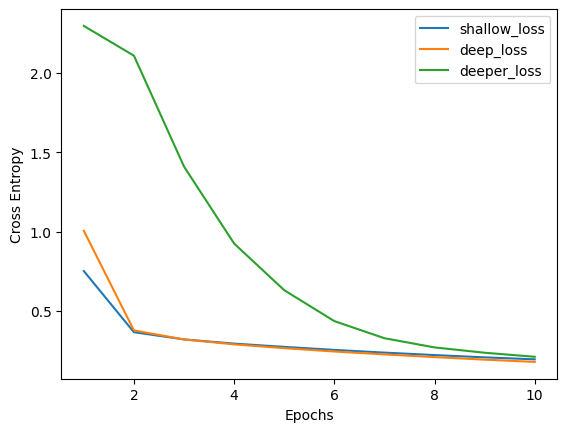

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Plot the lines
plt.plot(x, training_shallow_loss, label='shallow_loss')
plt.plot(x, training_deep_loss, label='deep_loss')
plt.plot(x, training_deeper_loss, label='deeper_loss')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.legend()

# Display the plot
plt.show()

### 1.4 Evaluation of trained model on trained data

In [ ]:
def evaluate_model(model, train_loader, test_loader):
    model.eval()  # Set the model to evaluation mode
    total_samples_train = 0
    total_samples_test = 0
    total_correct_train = 0
    total_correct_test = 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total_samples_train += labels.size(0)
            total_correct_train += (predicted == labels).sum().item()

    accuracy_train = 100 * total_correct_train / total_samples_train
    wrong_train = total_samples_train - total_correct_train
    print(f"Number of training data: {total_samples_train}")
    print(f"Number of wrongly predicted label: {wrong_train}")
    print(f"Accuracy of training: {accuracy_train}%")
    print()

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total_samples_test += labels.size(0)
            total_correct_test += (predicted == labels).sum().item()

    accuracy_test = 100.0 * total_correct_test / total_samples_test
    wrong_test = total_samples_test - total_correct_test

    print(f"Number of test data: {total_samples_test}")
    print(f"Number of wrongly predicted label: {wrong_test}")
    print(f"Accuracy of testing: {accuracy_test}%")
    print()


In [ ]:
print('----Model Shallow-----\n')
evaluate_model(model_shallow,train_dataloader,test_dataloader)

print('\n----Model Deep-----')
evaluate_model(model_deep,train_dataloader,test_dataloader)

print('\n----Model Deeper-----')
evaluate_model(model_deeper,train_dataloader,test_dataloader)

----Model Shallow-----

Number of training data: 60000
Number of wrongly predicted label: 3175
Accuracy of training: 94.70833333333333%

Number of test data: 10000
Number of wrongly predicted label: 534
Accuracy of testing: 94.66%


----Model Deep-----
Number of training data: 60000
Number of wrongly predicted label: 2901
Accuracy of training: 95.165%

Number of test data: 10000
Number of wrongly predicted label: 523
Accuracy of testing: 94.77%


----Model Deeper-----
Number of training data: 60000
Number of wrongly predicted label: 3492
Accuracy of training: 94.18%

Number of test data: 10000
Number of wrongly predicted label: 653
Accuracy of testing: 93.47%



# 2. Noisy inputs

### 2.1 Add some noise to the original data and visualize a few of the images

In [ ]:
def add_noise(image, mean=0.0, std=0.2):
  noise = torch.randn_like(image) * std + mean
  noisy_image = image + noise
  return noisy_image

In [ ]:
train_dataset_noisy = [(add_noise(image), label) for image, label in train_dataset]
test_dataset_noisy = [(add_noise(image), label) for image, label in test_dataset]

train_loader_noisy = DataLoader(train_dataset_noisy, batch_size=64, shuffle=True)
test_loader_noisy = DataLoader(test_dataset_noisy, batch_size=64, shuffle=False)

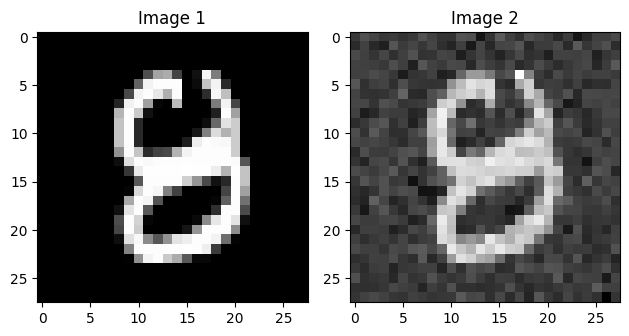

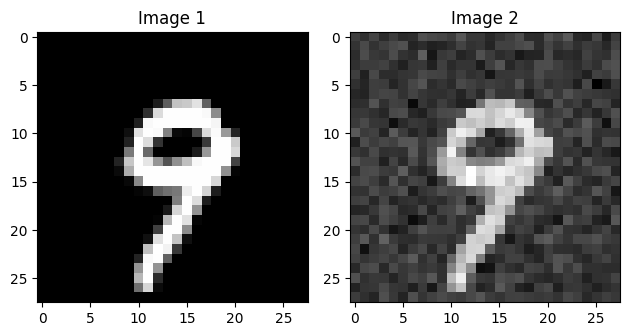

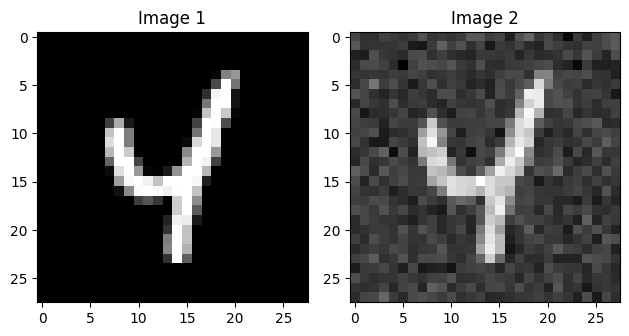

In [ ]:
count = 0
for images, label in train_dataloader:
  images = images.squeeze(1)
    # Iterate over each image in the batch
  for image in images:
    # Plot the image
    image_noise = add_noise(image)
    # image_noise = image_noise.numpy()
    image = image.numpy()

    fig, axes = plt.subplots(1, 2)

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Image 1')

    axes[1].imshow(image_noise, cmap='gray')
    axes[1].set_title('Image 2')

    plt.tight_layout()
    plt.show()
    count += 1
    if count > 2:
      break
  break

### 2.2 Train some models on the noisy dataset

In [ ]:
model_shallow = ShallowNN(784,128, 10)
model_deep = DeepNN(784,128,128,10)
model_deeper = DeeperNN(784,512,312,256,7,784,10)

training_shallow_loss_noisy =  training(model_shallow,train_loader_noisy)
training_deep_loss_noisy =  training(model_deep,train_loader_noisy)
training_deeper_loss_noisy =  training(model_deeper,train_loader_noisy)

Epoch [1/10], Loss: 0.8243, Accuracy: 77.58%
Epoch [2/10], Loss: 0.4272, Accuracy: 87.33%
Epoch [3/10], Loss: 0.3835, Accuracy: 88.52%
Epoch [4/10], Loss: 0.3571, Accuracy: 89.31%
Epoch [5/10], Loss: 0.3353, Accuracy: 89.89%
Epoch [6/10], Loss: 0.3147, Accuracy: 90.58%
Epoch [7/10], Loss: 0.2938, Accuracy: 91.16%
Epoch [8/10], Loss: 0.2744, Accuracy: 91.84%
Epoch [9/10], Loss: 0.2563, Accuracy: 92.40%
Epoch [10/10], Loss: 0.2395, Accuracy: 92.90%
Epoch [1/10], Loss: 1.0496, Accuracy: 70.74%
Epoch [2/10], Loss: 0.4378, Accuracy: 86.90%
Epoch [3/10], Loss: 0.3814, Accuracy: 88.42%
Epoch [4/10], Loss: 0.3477, Accuracy: 89.50%
Epoch [5/10], Loss: 0.3218, Accuracy: 90.16%
Epoch [6/10], Loss: 0.2973, Accuracy: 91.04%
Epoch [7/10], Loss: 0.2735, Accuracy: 91.70%
Epoch [8/10], Loss: 0.2516, Accuracy: 92.42%
Epoch [9/10], Loss: 0.2324, Accuracy: 92.97%
Epoch [10/10], Loss: 0.2131, Accuracy: 93.59%
Epoch [1/10], Loss: 2.0414, Accuracy: 22.67%
Epoch [2/10], Loss: 0.7429, Accuracy: 75.01%
Epoch [3

## 2.3 Visualization of the training loss for noisy input

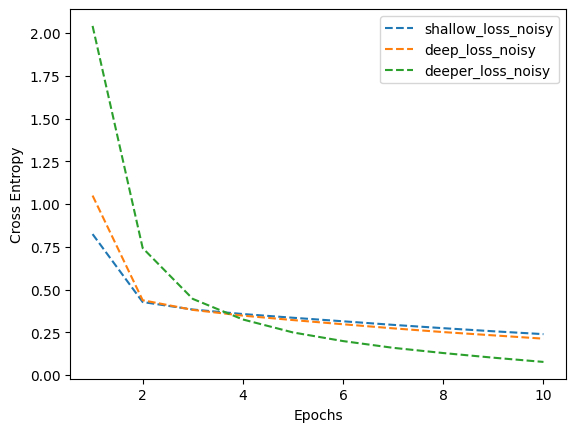

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Plot the lines
plt.plot(x, training_shallow_loss_noisy, linestyle='--', label='shallow_loss_noisy')
plt.plot(x, training_deep_loss_noisy, linestyle='--', label='deep_loss_noisy')
plt.plot(x, training_deeper_loss_noisy, linestyle='--', label='deeper_loss_noisy')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.legend()

# Display the plot
plt.show()

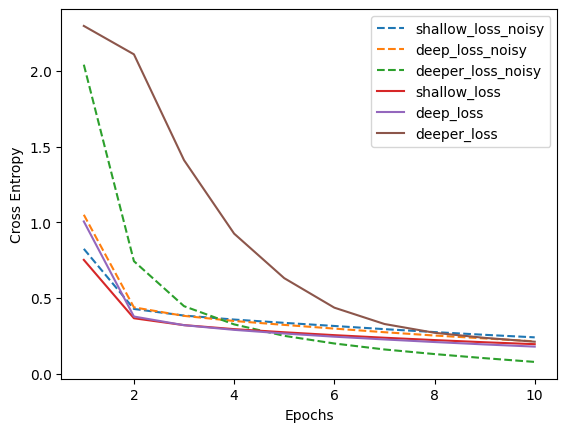

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Plot the lines
plt.plot(x, training_shallow_loss_noisy, linestyle='--', label='shallow_loss_noisy')
plt.plot(x, training_deep_loss_noisy, linestyle='--', label='deep_loss_noisy')
plt.plot(x, training_deeper_loss_noisy, linestyle='--', label='deeper_loss_noisy')
plt.plot(x, training_shallow_loss, label='shallow_loss')
plt.plot(x, training_deep_loss, label='deep_loss')
plt.plot(x, training_deeper_loss, label='deeper_loss')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.legend()

# Display the plot
plt.show()

# Display the plot
plt.show()

### 2.4 Evaluation against training and test dataset

In [ ]:
print('----Model Shallow-----\n')
evaluate_model(model_shallow,train_loader_noisy,test_loader_noisy)

print('\n----Model Deep-----')
evaluate_model(model_deep,train_loader_noisy,test_loader_noisy)

print('\n----Model Deeper-----')
evaluate_model(model_deeper,train_loader_noisy,test_loader_noisy)

----Model Shallow-----

Number of training data: 60000
Number of wrongly predicted label: 4107
Accuracy of training: 93.155%

Number of test data: 10000
Number of wrongly predicted label: 866
Accuracy of testing: 91.34%


----Model Deep-----
Number of training data: 60000
Number of wrongly predicted label: 3585
Accuracy of training: 94.025%

Number of test data: 10000
Number of wrongly predicted label: 807
Accuracy of testing: 91.93%


----Model Deeper-----
Number of training data: 60000
Number of wrongly predicted label: 925
Accuracy of training: 98.45833333333333%

Number of test data: 10000
Number of wrongly predicted label: 641
Accuracy of testing: 93.59%



# 3. Cross Entropy between Original input and Noisy input

###3.1

In [ ]:
image0_dataloader = []
image0_dataloader_noisy = []

train_loader_noisy_ = DataLoader(train_dataset_noisy, batch_size=64, shuffle=False)
train_dataloader_ = DataLoader(train_dataset, batch_size=64, shuffle=False)

for images, labels in train_dataloader_:
  for i in range(0, len(images), 1):
    if labels[i] == 0:
      image0_dataloader.append(images[i])

for images, labels in train_loader_noisy_:
  for i in range(0, len(images), 1):
    if labels[i] == 0:
      image0_dataloader_noisy.append(images[i])

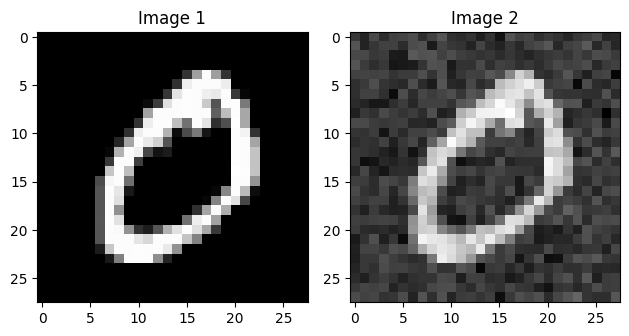

In [ ]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(image0_dataloader[0][0], cmap='gray')
axes[0].set_title('Image 1')

axes[1].imshow(image0_dataloader_noisy[0][0], cmap='gray')
axes[1].set_title('Image 2')

plt.tight_layout()
plt.show()

### 3.2 Compute probability distribution

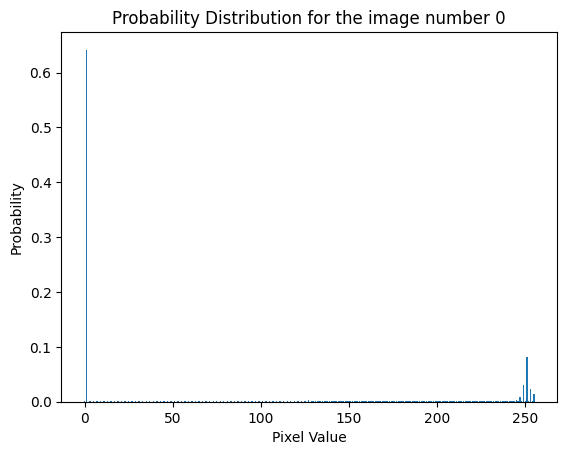

In [ ]:
pixel_counts = np.zeros(256)  # Initialize an array to store pixel counts

# Loop through each image and count pixel occurrences
for image in image0_dataloader:
    unique_pixels, counts = np.unique(image, return_counts=True)
    unique_pixels = (unique_pixels * 255).astype(np.uint8)
    pixel_counts[unique_pixels] += counts

# Normalize the pixel counts to get probabilities
pixel_probs = np.array(pixel_counts / np.sum(pixel_counts))

plt.bar(range(256), pixel_probs)

plt.xlabel('Pixel Value')
plt.ylabel('Probability')
plt.title('Probability Distribution for the image number 0')
plt.show()

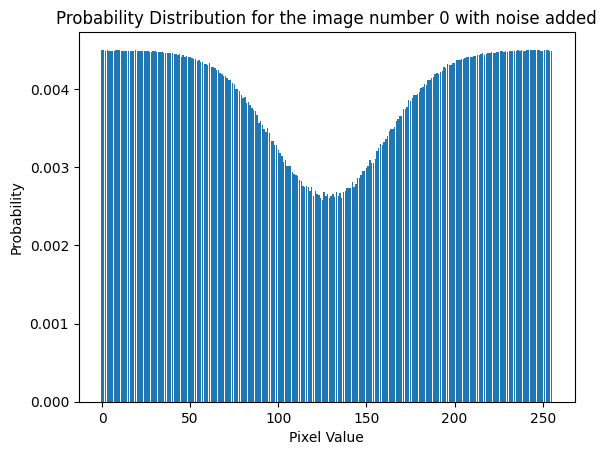

In [ ]:
pixel_counts_noisy = np.zeros(256)  # Initialize an array to store pixel counts

# Loop through each image and count pixel occurrences
for image in image0_dataloader_noisy:
    unique_pixels_noisy, counts_noisy = np.unique(image, return_counts=True)
    unique_pixels_noisy = (unique_pixels_noisy * 255).astype(np.uint8)
    pixel_counts_noisy[unique_pixels_noisy] += counts_noisy

# Normalize the pixel counts to get probabilities
pixel_probs_noisy = np.array(pixel_counts_noisy / np.sum(pixel_counts_noisy))

plt.bar(range(256), pixel_probs_noisy)

plt.xlabel('Pixel Value')
plt.ylabel('Probability')
plt.title('Probability Distribution for the image number 0 with noise added')
plt.show()

### 3.3 Compute Cross Entropy distribution

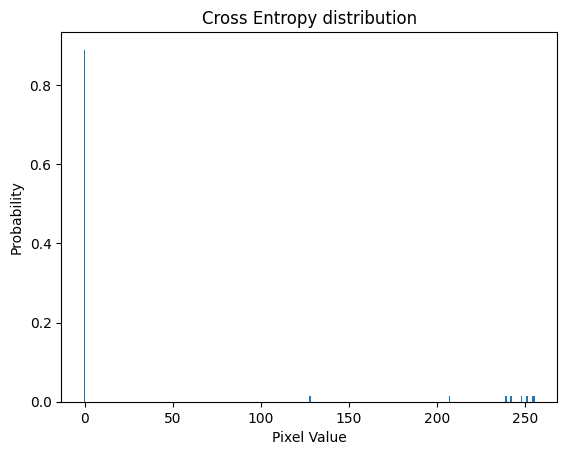

In [ ]:
#Cross entropy between original and noisy distribution
entropy = pixel_probs * np.log10(pixel_probs_noisy)

pixel_counts_noisy = np.zeros(256)  # Initialize an array to store pixel counts

# Loop through each image and count pixel occurrences

entropy, counts_noisy = np.unique(entropy, return_counts=True)
entropy = (entropy * 255).astype(np.uint8)
pixel_counts_noisy[entropy] += counts_noisy

# Normalize the pixel counts to get probabilities
Cross_Entropy = np.array(pixel_counts_noisy / np.sum(pixel_counts_noisy))

plt.bar(range(256), Cross_Entropy)

plt.xlabel('Pixel Value')
plt.ylabel('Probability')
plt.title('Cross Entropy distribution')
plt.show()

total_entropy = -np.sum(np.log10(pixel_probs_noisy) * pixel_probs)
print()
print(f'Total Cross entropy : {total_entropy}')